In [3]:
# Import libraries
import pandas as pd
import numpy as np

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
file_path = 'data/NSDUH_2021_Tab.txt'

data = pd.read_csv(file_path, sep='\t')

C:\Users\e.a.wright\AppData\Local\Temp\ipykernel_1528\2103078997.py:3: DtypeWarning: Columns (2792) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58034 entries, 0 to 58033
Columns: 2988 entries, QUESTID2 to VEREP
dtypes: float64(539), int64(2447), object(2)
memory usage: 1.3+ GB


#### MJEVER - Ever used marijuana/hashish
#### MJAGE - Age when first used marijuana/hashish
#### MJYFU - Year of first use marijuana/hashish use
#### MJMFU - Month of first use marijuana/hashish use
#### MJREC - Time sence last use marijuana/hashish
#### MJYRTOT - Total number of days used marijuana/hashish in past 12 months
#### MRTOTFG - Trimming indicator for MJRTOT
#### MJFQFLG - Trimmed MJRTOT if R is used < 12
#### MRBSTWAY -  EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH 
#### MRDAYPYR - # DAYS USED MARIJUANA/HASHISH PAST 12 MONTHS
#### MRDAYPMO - # DAYS PER MO USED MARIJUANA/HASHISH PAST 12 MOS
#### MRDAYPWK - # DAYS PER WEEK USED MARIJUANA/HASHISH PAST 12 MOS
#### MJDAY30A - # DAYS USED MARIJUANA/HASHISH PAST 30 DAYS
#### MR30EST - BEST EST. # DAYS USED MARIJUANA PAST 30 DAYS


In [52]:
col_list = ["CATAG3",
            "HEALTH2",
            "ANYHLTI2",
            "INCOME",
            "POVERTY3",  
            "TOBFLAG", 
            "MRJFLAG",
            "PYUD5MRJ",
            "MJYRTOT", # TOTAL # OF DAYS USED MARIJUANA IN PAST 12 MOS (61)
            "ALCFLAG", 
            "COCFLAG", 
            "CRKFLAG", 
            "HERFLAG", 
            "LSDFLAG", 
            "METHAMFLAG",
            "ADDPREV", # SEVERAL DAYS OR LNGR WHEN FELT SAD/EMPTY/DPRSD (506)
            "ADSMMDEA",
            "YODSMMDE"]

In [64]:
# Subset dataset to dataframe of variables of interest
df = data[col_list]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58034 entries, 0 to 58033
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      58034 non-null  int64  
 1   HEALTH2     58015 non-null  float64
 2   ANYHLTI2    58034 non-null  int64  
 3   INCOME      58034 non-null  int64  
 4   POVERTY3    57990 non-null  float64
 5   TOBFLAG     58034 non-null  int64  
 6   MRJFLAG     58034 non-null  int64  
 7   PYUD5MRJ    57474 non-null  float64
 8   MJYRTOT     58034 non-null  int64  
 9   ALCFLAG     58034 non-null  int64  
 10  COCFLAG     58034 non-null  int64  
 11  CRKFLAG     58034 non-null  int64  
 12  HERFLAG     58034 non-null  int64  
 13  LSDFLAG     58034 non-null  int64  
 14  METHAMFLAG  58034 non-null  int64  
 15  ADDPREV     58034 non-null  int64  
 16  ADSMMDEA    58034 non-null  int64  
 17  YODSMMDE    58034 non-null  int64  
dtypes: float64(3), int64(15)
memory usage: 8.0 MB


In [54]:
# CATAG3      
df.CATAG3.value_counts()     

2    13979
4    12561
5    11163
1    10743
3     9588
Name: CATAG3, dtype: int64

In [55]:
df.HEALTH2.value_counts()

2.0    21931
3.0    16870
1.0    13030
4.0     6184
Name: HEALTH2, dtype: int64

In [56]:
df.ANYHLTI2.value_counts()

1     49880
2      4898
98     2681
94      465
97      110
Name: ANYHLTI2, dtype: int64

In [65]:
# Clean ANYHLTI2

# Drop 94, 97, and 98
df = df[df['ANYHLTI2'] != 94]
df = df[df['ANYHLTI2'] != 97]
df = df[df['ANYHLTI2'] != 98]

In [58]:
# INCOME

df.INCOME.value_counts()

4    22577
2    14675
1     9373
3     8153
Name: INCOME, dtype: int64

In [66]:
# POVERTY3

# Drop rows with missing values
df = df.dropna(subset=['POVERTY3'])

In [67]:
# Clean PYUD5MRJ

# Replace 91 and 93 with 0
df['PYUD5MRJ'] = df['PYUD5MRJ'].replace([91, 93], 0)

# Drop null values
df = df.dropna(subset=['PYUD5MRJ'])

In [68]:
# Process MJYRTOT

# Set 991 and 993 to 0
df.loc[df['MJYRTOT'] == 991, 'MJYRTOT'] = 0
df.loc[df['MJYRTOT'] == 993, 'MJYRTOT'] = 0

# Drop all values outside of the range: 0-365
df = df[df['MJYRTOT'] <= 365]

In [69]:
# Clean ADDPREV

# Replace 99s with 0s
df['ADDPREV'] = df['ADDPREV'].replace(99, 0)

# Change all 2s to 0s
df['ADDPREV'] = df['ADDPREV'].replace(2, 0)

# Exclude all values that are not 1 or 0
df = df[(df['ADDPREV'] == 1) | (df['ADDPREV'] == 0)]

# Inspect
df.ADDPREV.value_counts()

0    38536
1    15426
Name: ADDPREV, dtype: int64

In [ ]:
# Inspect ADSMMDEA

# We could use age to help us rectify the "LEGITIMATE SKIP" problem

# q: How can we combine ADSMMDEA & YODSMMDE?

In [70]:
df.ADSMMDEA.value_counts()

98    33895
99    10271
1      8570
2      1203
94       20
97        3
Name: ADSMMDEA, dtype: int64

In [71]:
df.YODSMMDE.value_counts()

99    43691
98     7279
1      2558
2       407
94       23
97        4
Name: YODSMMDE, dtype: int64

In [72]:
# Clean ADSMMDEA

# Replace 2s, 98s, and 99s with 0
df['ADSMMDEA'] = df['ADSMMDEA'].replace([2, 98, 99], 0)

# Exclude anything other than 0 and 1
df = df[df['ADSMMDEA'].isin([0, 1])]

In [73]:
# Clean YODSMMDE

# Replace 2s, 98s, and 99s with 0
df['YODSMMDE'] = df['YODSMMDE'].replace([2, 98, 99], 0)

# Exclude anything other than 0 and 1
df = df[df['YODSMMDE'].isin([0, 1])]

In [75]:
# Create new variable to "combine" the Adult and Youth Depression Target Variables

# Its a conditional variable; where ADSMMDEA or YODSMMDE is 1, then DEP is 1
# If both are 0, then DEP is 0

# ADSMMDEA: Adult Depression Target Variable
# YODSMMDE: Youth Depression Target Variable

# DEP: New Depression Target Variable

# We want to only keep the fields or the rows where ADSMMDEA or YODSMMDE is 1 or 0

# DEP gets 1 when ADSMMDEA or YODSMMDE is 1
# DEP gets 0 when ADSMMDEA and YODSMMDE are 0

df['DEP'] = np.where((df['ADSMMDEA'] == 1) | (df['YODSMMDE'] == 1), 1, 0)


In [76]:
# Inspect
df.DEP.value_counts()

0    42784
1    11128
Name: DEP, dtype: int64

In [78]:
df.head()

,CATAG3,HEALTH2,ANYHLTI2,INCOME,POVERTY3,TOBFLAG,MRJFLAG,PYUD5MRJ,MJYRTOT,ALCFLAG,COCFLAG,CRKFLAG,HERFLAG,LSDFLAG,METHAMFLAG,ADDPREV,ADSMMDEA,YODSMMDE,DEP
0,3,4.0,1,1,2.0,1,1,0.0,52,1,0,0,0,0,0,0,0,0,0
1,5,3.0,1,4,3.0,1,0,0.0,0,1,0,0,0,0,0,0,0,0,0
2,2,2.0,1,2,2.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0
3,4,2.0,1,2,2.0,1,1,1.0,364,1,0,0,0,0,0,1,0,0,0
4,2,1.0,2,1,1.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
# Drop irrelevant targets ('ADDPREV', 'ADSMMDEA', 'YODSMMDE')
subset = df.drop(['ADDPREV', 'ADSMMDEA', 'YODSMMDE'], axis=1)

# Inspect
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53912 entries, 0 to 58033
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53912 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53912 non-null  int64  
 3   INCOME      53912 non-null  int64  
 4   POVERTY3    53912 non-null  float64
 5   TOBFLAG     53912 non-null  int64  
 6   MRJFLAG     53912 non-null  int64  
 7   PYUD5MRJ    53912 non-null  float64
 8   MJYRTOT     53912 non-null  int64  
 9   ALCFLAG     53912 non-null  int64  
 10  COCFLAG     53912 non-null  int64  
 11  CRKFLAG     53912 non-null  int64  
 12  HERFLAG     53912 non-null  int64  
 13  LSDFLAG     53912 non-null  int64  
 14  METHAMFLAG  53912 non-null  int64  
 15  DEP         53912 non-null  int32  
dtypes: float64(3), int32(1), int64(12)
memory usage: 8.8 MB


In [81]:
# Drop null values
subset = subset.dropna()

In [82]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53896 entries, 0 to 58033
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53896 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53896 non-null  int64  
 3   INCOME      53896 non-null  int64  
 4   POVERTY3    53896 non-null  float64
 5   TOBFLAG     53896 non-null  int64  
 6   MRJFLAG     53896 non-null  int64  
 7   PYUD5MRJ    53896 non-null  float64
 8   MJYRTOT     53896 non-null  int64  
 9   ALCFLAG     53896 non-null  int64  
 10  COCFLAG     53896 non-null  int64  
 11  CRKFLAG     53896 non-null  int64  
 12  HERFLAG     53896 non-null  int64  
 13  LSDFLAG     53896 non-null  int64  
 14  METHAMFLAG  53896 non-null  int64  
 15  DEP         53896 non-null  int32  
dtypes: float64(3), int32(1), int64(12)
memory usage: 6.8 MB


In [83]:
# Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# Import train_test_split and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [84]:
# Instantiate a Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42)

# Define X and y
X = subset.drop('DEP', axis=1)
y = subset['DEP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the model to the oversampled training data
gbt.fit(X_train, y_train)

# Predict on the test data
y_pred = gbt.predict(X_test)


In [85]:
# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     10684
           1       0.61      0.07      0.13      2790

    accuracy                           0.80     13474
   macro avg       0.71      0.53      0.51     13474
weighted avg       0.76      0.80      0.73     13474



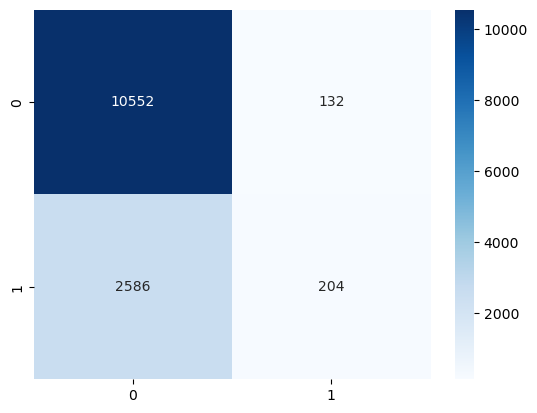

In [86]:
# Print a pretty confusion matrix
ax1 = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show(ax1)

In [88]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbt.feature_importances_
features = X_train.columns
# Create dataframe
feature_importance_df = pd.DataFrame({"feature": features, "feature_importance": fi_values})
# Sort in descending order
feature_importance_df = feature_importance_df.sort_values(by="feature_importance", ascending = False)
# View dataframe
feature_importance_df

,feature,feature_importance
0,CATAG3,0.293856
1,HEALTH2,0.259450
6,MRJFLAG,0.155807
8,MJYRTOT,0.109065
7,PYUD5MRJ,0.048226
9,ALCFLAG,0.042801
13,LSDFLAG,0.026145
3,INCOME,0.015634
4,POVERTY3,0.010244
2,ANYHLTI2,0.010034


In [6]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Ensembled sampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier

In [8]:
# Read in csv
subset = pd.read_csv('data/model_subset.csv')

In [13]:
subset = subset.dropna()

In [14]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53896 entries, 0 to 53911
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53896 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53896 non-null  int64  
 3   INCOME      53896 non-null  int64  
 4   POVERTY3    53896 non-null  float64
 5   TOBFLAG     53896 non-null  int64  
 6   MRJFLAG     53896 non-null  int64  
 7   PYUD5MRJ    53896 non-null  float64
 8   MJYRTOT     53896 non-null  int64  
 9   ALCFLAG     53896 non-null  int64  
 10  COCFLAG     53896 non-null  int64  
 11  CRKFLAG     53896 non-null  int64  
 12  HERFLAG     53896 non-null  int64  
 13  LSDFLAG     53896 non-null  int64  
 14  METHAMFLAG  53896 non-null  int64  
 15  ADDPREV     53896 non-null  int64  
 16  ADSMMDEA    53896 non-null  int64  
 17  YODSMMDE    53896 non-null  int64  
 18  DEP         53896 non-null  int64  
dtypes: float64(3), int64(16)


In [15]:
# Define X and y
X = subset.drop('DEP', axis=1)
y = subset['DEP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Train the balanced random forest model
brf = BalancedRandomForestClassifier(random_state=42)
brf_model_cv = cross_validate(brf, X_train, y_train, cv = 5, n_jobs = -1, scoring="precision")

# Check the model performance
print(f"{brf_model_cv['test_score'].mean():.3f} +/- {brf_model_cv['test_score'].std():.3f}")

1.000 +/- 0.000


In [ ]:
# Next Model

In [19]:
# Train the balanced bagging classifier model using near miss under sampling
bbc_nm = BalancedBaggingClassifier(random_state=42, sampler=(NearMiss(version=3)))
bbc_nm_model_cv = cross_validate(bbc_nm, X_train, y_train, cv = 5, n_jobs = -1, scoring="recall")

# Check the model performance
print(f"{bbc_nm_model_cv['test_score'].mean():.3f} +/- {bbc_nm_model_cv['test_score'].std():.3f}")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\utils\fixes.py", line 85, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\ensemble\_bagging.py", line 422, in fit
    return super().fit(X, y)
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\ensemble\_bagging.py", line 337, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\ensemble\_bagging.py", line 437, in _fit
    return super()._fit(X, y, self.max_samples, sample_weight=None)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\ensemble\_bagging.py", line 472, in _fit
    all_results = Parallel(
                  ^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
             ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\_parallel_backends.py", line 597, in __init__
    self.results = batch()
                   ^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\parallel.py", line 123, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\ensemble\_bagging.py", line 144, in _parallel_build_estimators
    estimator_fit(X_, y[indices])
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\pipeline.py", line 422, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\base.py", line 208, in fit_resample
    return super().fit_resample(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\base.py", line 112, in fit_resample
    output = self._fit_resample(X, y)
             ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py", line 269, in _fit_resample
    dist_vec, idx_vec = self.nn_ver3_.kneighbors(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\neighbors\_base.py", line 824, in kneighbors
    results = ArgKmin.compute(
              ^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py", line 277, in compute
    return ArgKmin64.compute(
           ^^^^^^^^^^^^^^^^^^
  File "sklearn\metrics\_pairwise_distances_reduction\_argkmin.pyx", line 95, in sklearn.metrics._pairwise_distances_reduction._argkmin.ArgKmin64.compute
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\fixes.py", line 139, in threadpool_limits
    return threadpoolctl.threadpool_limits(limits=limits, user_api=user_api)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 171, in __init__
    self._original_info = self._set_threadpool_limits()
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 268, in _set_threadpool_limits
    modules = _ThreadpoolInfo(prefixes=self._prefixes,
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 340, in __init__
    self._load_modules()
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 373, in _load_modules
    self._find_modules_with_enum_process_module_ex()
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 485, in _find_modules_with_enum_process_module_ex
    self._make_module_from_path(filepath)
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'


In [ ]:
# Train the balanced random forest model
brf = BalancedRandomForestClassifier(random_state=42)
brf_model = brf.fit(X_train, y_train)
brf_prediction = brf_model.predict(X_test)

# Check the model performance
print(classification_report(y_test, brf_prediction))

# Sweet Sweet Victory!

In [98]:
# Write subset to a csv file
df.to_csv('data/model_subset.csv', index=False)